In [7]:
import find_source
from find_source import summary

In [8]:
#summary('../data/11151/l1551-51.fits', False, False, True, '../paper_figs')

<Figure size 640x480 with 0 Axes>

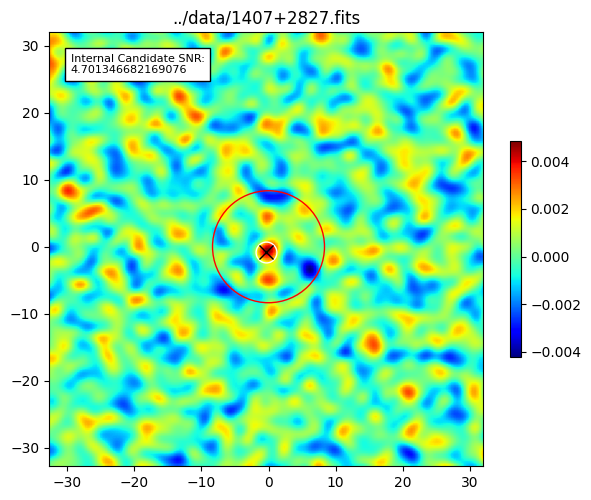

In [9]:
summary('../data/1407+2827.fits', False, False, True)#, '../paper_figs')